In [1]:
# 1)Loading and Visualizing Data

In [2]:
URL = 'https://data.seattle.gov/api/views/7mre-hcut/rows.csv?accessType=DOWNLOAD'
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x193e31aeac0>)

In [3]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2014-05-11 22:00:00,48.0,26.0
2018-05-23 23:00:00,30.0,34.0
2014-01-09 09:00:00,148.0,240.0
2017-04-08 02:00:00,0.0,2.0
2015-10-10 13:00:00,20.0,44.0


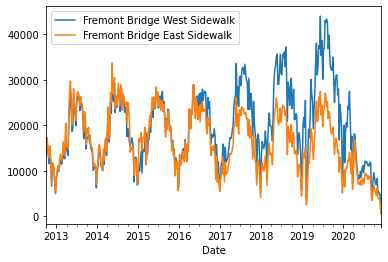

In [4]:
%matplotlib inline
data.resample('W').sum().plot();

In [5]:
# 2) Further Data Exploration

<AxesSubplot:xlabel='Date'>

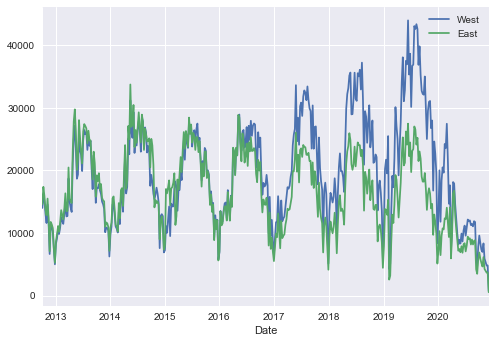

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ('West','East')

data.resample('W').sum().plot()


<AxesSubplot:xlabel='Date'>

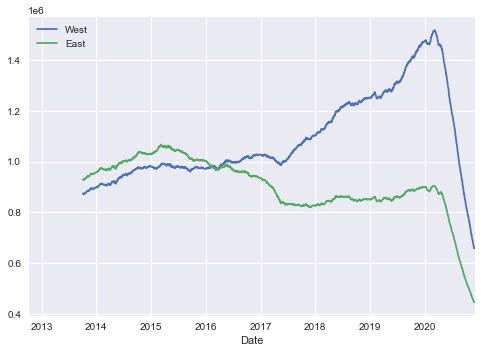

In [7]:
data.resample('D').sum().rolling(365).sum().plot()


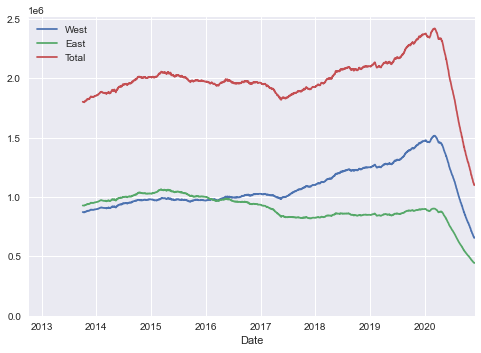

In [8]:
data['Total']=data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0 , None);

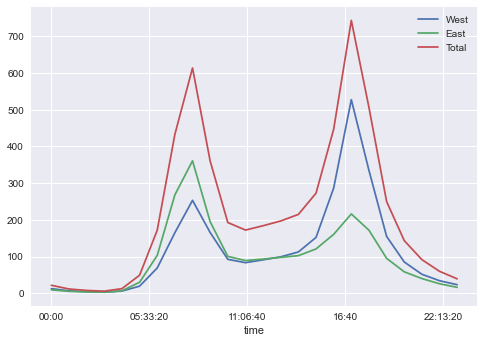

In [9]:
data.groupby(data.index.time).mean().plot();

In [10]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,26.0,36.0,22.0,30.0,22.0
01:00:00,20.0,6.0,16.0,30.0,34.0
02:00:00,4.0,18.0,14.0,18.0,6.0
03:00:00,10.0,6.0,8.0,6.0,12.0
04:00:00,14.0,16.0,18.0,10.0,6.0


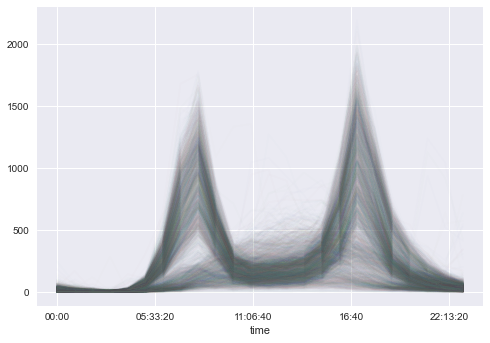

In [11]:
pivoted.plot(legend = False , alpha=0.01);